# Анализ изменения цены на медицнские услуги

![Nowat](https://cdn.regnum.ru/uploads/pictures/news/2018/04/11/regnum_picture_1523451997376225_normal.jpg)

**Дано**: датасет на 87к строк с построковым описанием медицинских услуг  
**Период**: 01.2021 - 08.2022  
**Основная задача**: сравнить ценообразование на мед.услуги за два периода
**Дополнительные задачи**: проанализировать тенденции, сформулировать гипотезы, выявить причины, которые могли привести к изменению стоимости услуг  

**План решения:**
1. Знакомство с датасетом
2. Предобработка датасета
3. Анализ изменения цены
4. Проверка гипотез
5. Вывод

**Специфика задачи**  
**Медицинский кейс**  - последовательность медицинских услуг, полученных одним застрахованном в одной клинике с интервалом между любыми соседними по дате услугами не более 14 дней. Т.е. между любыми 2-мя соседними услугами в кейсе не должно быть разрыва более 14 дней.

**Визит**  - уникальное сочетание даты оказания услуги, застрахованного. Т.е. один визит - это один день, в который застрахованный побывал в клинике. Если был в одной клинике 2 раза, но в разные дни, то это два визита. Если получал услуги (в любом количестве) в одной клинике в один день, то это один визит.

Обратившийся в месяц - уникальное сочетание месяца оказания услуги и идентификатора пациента

**Описание датасета**

- record_id- уникальный идентификатор строки данных
- service_date - дата оказания медицинской услуги
- service_name - наименование медицинской услуги
- service_number - количество услуг
- service_amount - сумма выплат (стоимость оказанных услуг в рублях)
- insured - уникальный идентификатор пациента
- sex_id - пол пациента
- age_for_service_date - возраст пациента

## ON BOARDING

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

**Загрузка датасета**

In [3]:
df = pd.read_excel('data_test_task_2022.xlsx')
df.sample(5)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
8494,30620844303,2021-04-23,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,544636,1.0,22
11946,30785995403,2021-05-11,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,596456,2.0,37
85042,33178101503,2022-08-29,Взятие мазка,396,1,1302539,2.0,33
72836,32801006103,2022-06-14,"Прием уролога, первичный",1540,1,744012,2.0,55
19592,31111759703,2021-07-17,Взятие крови из периферической вены,158,1,651988,2.0,36


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   record_id             85369 non-null  int64  
 1   service_date          85369 non-null  object 
 2   service_name          85369 non-null  object 
 3   service_amount        85369 non-null  int64  
 4   service_number        85369 non-null  int64  
 5   insured               85369 non-null  int64  
 6   sex_id                85348 non-null  float64
 7   age_for_service_date  85369 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 5.2+ MB


**Входные данные**

In [5]:
print('Исходный датасет')
print(f'Количество строк {df.shape[0]}')
print(f'Количество столбцов {df.shape[1]}')

Исходный датасет
Количество строк 85369
Количество столбцов 8


**Дубликаты**

In [6]:
mydups = df.duplicated().sum()
print('Количество полных дубликтов в датасете', mydups)

Количество полных дубликтов в датасете 0


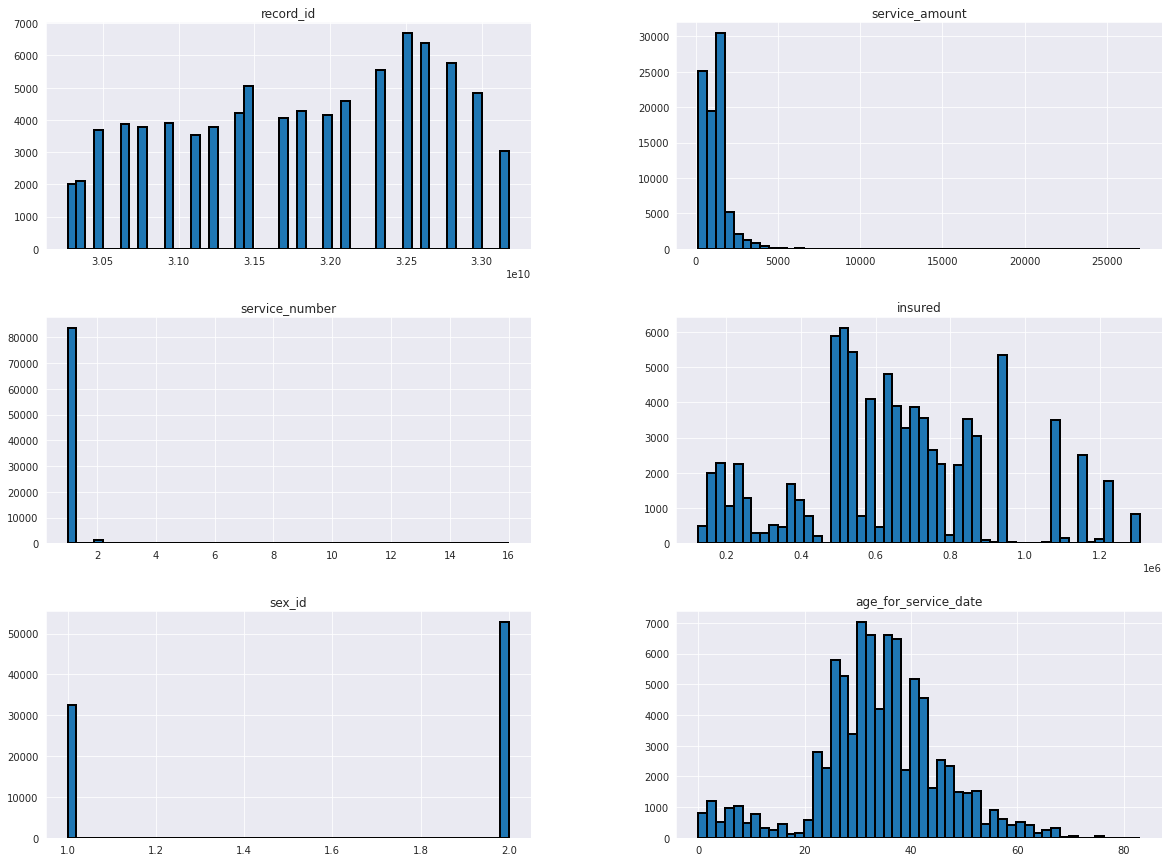

In [7]:
df.hist(bins=50, figsize=(20,15), edgecolor='black', linewidth=2)
plt.show()

**Пропуски**

In [8]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('brg')

,0
record_id,0.000000
service_date,0.000000
service_name,0.000000
service_amount,0.000000
service_number,0.000000
insured,0.000000
sex_id,0.000000
age_for_service_date,0.000000


**Период выгрузки**

In [9]:
max_date = df['service_date'].max()
min_date = df['service_date'].min()
print(f'Данные представлены за период c {min_date} по {max_date}')

Данные представлены за период c 2021-01-03 по 2022-08-31


In [10]:
df['service_date'] = pd.to_datetime(df['service_date'])

Рассмотрим распределение оказанных услуг по месяцам.

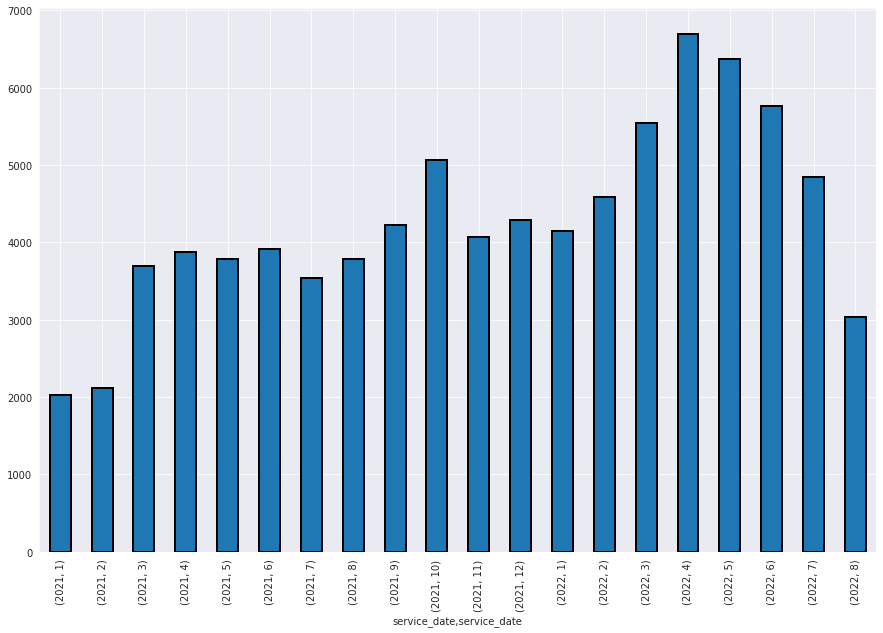

In [11]:
df_all_dates = df['service_date']
df_all_dates.groupby([df_all_dates.dt.year, df_all_dates.dt.month]).count().plot(kind="bar", figsize = (15,10), edgecolor='black', linewidth=2)
plt.show()

Если названия услуг статичны, а не произвольны, то мы можем получить данные об изменении стоимости услуг по наиболее популярным услугам.  
Проверим верный ли это пусть с помощью value_counts()

In [12]:
df['service_name'].value_counts().head(15).reset_index()

,index,service_name
0,Прием первичный,6058
1,Прием повторный,4477
2,Взятие крови из периферической вены,4215
3,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",3190
4,Магнитотерапия (1 сеанс),2838
5,Взятие мазка,1567
6,Общий анализ мочи,1550
7,Лазеротерапия (1 сеанс),1313
8,Интерференционные токи (1 сеанс) (4 поля),1195
9,Гинекологический мазок,1194


In [13]:
print(f'Количество уникальных пациентов в датасете: {df["insured"].nunique()}')

Количество уникальных пациентов в датасете: 4488


Выгрузив топ 15 услуг мы видим, что их частоты вполне достаточно, чтобы сделать вывод об изменении цены.

In [14]:
print(f'Среднее количество услуг на одного пациента: {round(len(df)/df["insured"].nunique(),0)}')

Среднее количество услуг на одного пациента: 19.0


**Вывод**  
В рамках задачи был получен датасет по медицинским услугам. Параметры датасета:
1. Количество строк - 85 369
2. Количество столбцов - 8
3. Полные дубликаты - 0
4. Пропуски  - 0
5. Период  c 2021-01-03 по 2022-08-31 
6. Количество ункальных пациентов - 4 488 чел.
7. Среднее количество оказанных услуг на 1 пациента за весь период - 19.

Распределение по количеству оказанных услуг по месяцам не одинаково. Присутствует сезонность.

## Предобработка

В столбце service_number указано количество услуг. 
Проверим указана ли там стоимость за услугу или за услугу * кол-во.

In [15]:
df.query('service_number > 1').head(5)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
123,30268169303,2021-01-17,Удаление серных пробок (за ухо),1324,2,243480,1.0,34
178,30268174803,2021-01-15,Взятие мазка,682,2,221536,1.0,35
228,30268179803,2021-01-30,Рефрактометрия,1428,2,362887,2.0,31
402,30268197203,2021-01-04,Взятие материала для цитологического исследования,568,2,176388,2.0,39
407,30268197703,2021-01-11,Рефрактометрия,1428,2,176388,2.0,39


In [16]:
df.loc[df['service_name'] == 'Рефрактометрия'].head(8)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
228,30268179803,2021-01-30,Рефрактометрия,1428,2,362887,2.0,31
230,30268180003,2021-01-21,Рефрактометрия,714,1,346621,2.0,39
274,30268184403,2021-01-22,Рефрактометрия,714,1,490772,2.0,35
350,30268192003,2021-01-23,Рефрактометрия,714,1,488030,2.0,23
384,30268195403,2021-01-16,Рефрактометрия,714,1,490825,2.0,25
407,30268197703,2021-01-11,Рефрактометрия,1428,2,176388,2.0,39
471,30268204103,2021-01-21,Рефрактометрия,714,1,490556,2.0,11
786,30268235603,2021-01-19,Рефрактометрия,714,1,194724,2.0,31


Да, указана совокупная стоимость.  
Необходимо создать отдельный столбец со стоимостью именно услуги.

In [17]:
df['service_price'] = df['service_amount'] / df['service_number'] 

Так же создадим доп.столбец с сегментом по возрасту клиента. Используем типовые сегменты.

In [21]:
def categorize_age(age):
    if age > 17 and age <24:
        return '1. 18-24'
    elif age >= 24 and age <30:
        return '2. 24-30'
    elif age >= 30 and age <36:
        return '3. 30-36'
    elif age >= 36 and age <42:
        return '4. 36-42'
    elif age >= 42 and age <48:
        return '5. 42-48'
    elif age >= 48 and age <54:
        return '6. 48-54'
    elif age >= 54 and age <60:
        return '7. 54 - 60'
    elif age >= 60:
        return '8. 60+'
    elif age < 18:
        return '0. до 18'

In [22]:
df['age_group'] = df['age_for_service_date'].apply(categorize_age)

In [23]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('brg')

,0
record_id,0.000000
service_date,0.000000
service_name,0.000000
service_amount,0.000000
service_number,0.000000
insured,0.000000
sex_id,0.000000
age_for_service_date,0.000000
service_price,0.000000
age_group,0.000000


В рамках предобработки:
- было добавлено 2 новых столбца
- была произведена повторная проверка на пропуски(не выявлено)

## Проверка гипотез

### Гипотеза 1
**Стоимость лечения в 2022 не изменилась по сравнению с показателями 2021 года.**


Для этого нам необходимо взять идентичные календарные периоды. 
Разделим выборки.

In [24]:
df_2021 = df.loc[df['service_date'].dt.year == 2021]
df_2021 = df_2021.loc[df_2021['service_date'].dt.month <= 8]
df_2022 = df.loc[df['service_date'].dt.year == 2022]

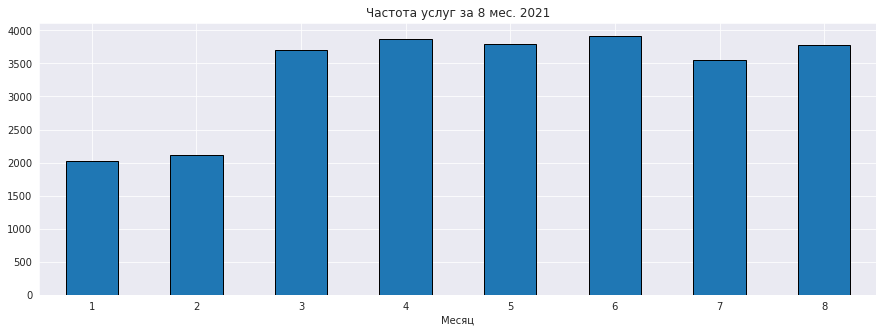

In [25]:
df_2021.groupby(df_2021['service_date'].dt.month)['record_id'].count().plot(
    kind='bar', y='record_id', figsize=(15,5), edgecolor='black')
plt.title('Частота услуг за 8 мес. 2021')
plt.xticks(rotation=0)
plt.xlabel('Месяц')
plt.show()

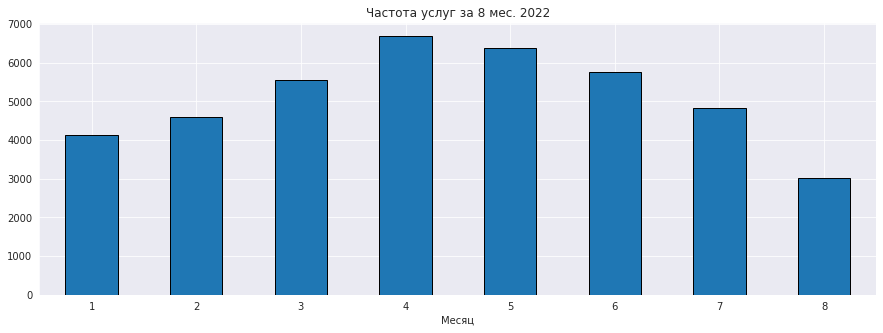

In [26]:
df_2022.groupby(df_2022['service_date'].dt.month)['record_id'].count().plot(
    kind='bar', y='record_id', figsize=(15,5), edgecolor='black')
plt.title('Частота услуг за 8 мес. 2022')
plt.xticks(rotation=0)
plt.xlabel('Месяц')
plt.show()

Судя по распределению часть данных за август 2022 может отсутствовать. Вероятно не все данные догрузились. Можно было бы списать такой спад на сезонность, но в 2021 такой спад по количеству услуг не наблюдается.

In [27]:
print(f'Количество записей за 2021 год {len(df_2021)}')
print(f'Количество записей за 2022 год {len(df_2022)}')

Количество записей за 2021 год 26736
Количество записей за 2022 год 40977


Предварительно можно сделать вывод, что увеличилось количество оказанных услуг. Проверим коллерирует ли это с количеством уникальных клиентов.

In [28]:
print(f'Количество уникальных пациентов в 2021 году {df_2021["insured"].nunique()}')
print(f'Количество уникальных пациентов в 2022 году {df_2022["insured"].nunique()}')

Количество уникальных пациентов в 2021 году 1733
Количество уникальных пациентов в 2022 году 2757


Да, в 2022 году выросло количество клиентов посещаемых клинику.

In [29]:
print(f'Среднее количество услуг на одного пациента в 2021: {round(len(df_2021)/df_2021["insured"].nunique(),2)}')
print(f'Среднее количество услуг на одного пациента в 2022: {round(len(df_2022)/df_2022["insured"].nunique(),2)}')

Среднее количество услуг на одного пациента в 2021: 15.43
Среднее количество услуг на одного пациента в 2022: 14.86


**Вывод:** показатель среднего количество оказанных услуг на одного пользователя практически не отличается.
Изучим популярность услуг по годам.

In [30]:
df_2021['service_name'].value_counts().head(12).reset_index()

,index,service_name
0,Прием первичный,4478
1,Прием повторный,3295
2,Взятие крови из периферической вены,1297
3,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",995
4,Магнитотерапия (1 сеанс),806
5,Общий анализ мочи,491
6,Взятие мазка,396
7,Гинекологический мазок,376
8,Интерференционные токи (1 сеанс) (4 поля),366
9,Лазеротерапия (1 сеанс),344


In [31]:
df_2022['service_name'].value_counts().head(12).reset_index()

,index,service_name
0,Взятие крови из периферической вены,2024
1,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",1517
2,Магнитотерапия (1 сеанс),1449
3,"Прием гинеколога, повторный",964
4,"Прием трапевта, первичный",936
5,Взятие мазка,897
6,"Прием отоларинголога, первичный",721
7,Общий анализ мочи,711
8,"Прием невролога, первичный",690
9,Лазеротерапия (1 сеанс),656


**Вывод**:  
Лидеры оказанных услуг за 2021 и 2022 отличаются. Вероятно это связано с доп.сегментацией услуг. Например, если в 2021 по "Приёму" было всего два сегмента: первичный и повторный, то уже в 2022 сегментация приёмов сделана более детально, по специалистам. 
При этом, на лабораторные услуги названия сохранились. Их можно сравнивать. Для этого возьмём по 200 самых популярных услуг за каждый период.

In [33]:
df21 = df_2021.groupby('service_name')['service_price'].agg(['count', 'mean']).sort_values(by=['count'], ascending=False).head(200)
df22 = df_2022.groupby('service_name')['service_price'].agg(['count', 'mean']).sort_values(by=['count'], ascending=False).head(200)
merged_df = df21.merge(df22, on='service_name', suffixes=('_2021', '_2022'))
len(merged_df)

134

В результате объединения мы получили 134 идентичные(по названию) услуги по которым можно проводить сравнение стоимости 

In [34]:
merged_df.head(15)

,count_2021,mean_2021,count_2022,mean_2022
service_name,,,,
Взятие крови из периферической вены,1297,158.000000,2024,173.191700
"Общий анализ крови (лейкоцитарная форм,, СОЭ)",995,693.000000,1517,744.133158
Магнитотерапия (1 сеанс),806,1040.000000,1449,1096.356108
Общий анализ мочи,491,431.000000,711,458.924051
Взятие мазка,396,340.280303,897,367.979933
Гинекологический мазок,376,525.000000,614,560.423453
Интерференционные токи (1 сеанс) (4 поля),366,1040.000000,585,1097.641026
Лазеротерапия (1 сеанс),344,914.000000,656,966.265244
Сеанс рефлексотерапии,313,1827.000000,342,1932.807018


Теперь выведем для каждой услуги процент изменения цены.

In [35]:
merged_df['price_change_pct'] = ((merged_df['mean_2022'] - merged_df['mean_2021']) / merged_df['mean_2021']) * 100
merged_df.sample(15)

,count_2021,mean_2021,count_2022,mean_2022,price_change_pct
service_name,,,,,
Фибриноген,14,352.000000,26,375.769231,6.752622
"Спирография с бронхолитиком (беротек, вентолин)",24,1260.000000,41,1348.536585,7.026713
Лазеротерапия (1 сеанс),344,914.000000,656,966.265244,5.718298
Взятие мазка,396,340.280303,897,367.979933,8.140239
Общий белок,84,287.000000,115,300.000000,4.529617
Общий анализ мочи,491,431.000000,711,458.924051,6.478898
ТТГ (тиреотропин),246,536.000000,384,567.395833,5.857432
Гинекологический мазок,376,525.000000,614,560.423453,6.747324
Урологический мазок,32,525.000000,80,563.750000,7.380952


Посчитаем средний процент изменение цены по сравнительной таблице.

In [36]:
print(f'Среднее значение изменение цен на популярные мед.услуги  составляет +{round(merged_df["price_change_pct"].mean(),2)}%')
print(f'Медиана  составляет +{round(merged_df["price_change_pct"].median(),2)}%')

Среднее значение изменение цен на популярные мед.услуги  составляет +6.27%
Медиана  составляет +6.26%


Cреднее значение и медиана находятся рядом это может указывать на то, что данные распределены равномерно, влияние выбросов минимально.

Изучим ТОП-10 услуг, которые были использованы для сравнительного анализа.

In [37]:
merged_df.head(10)

,count_2021,mean_2021,count_2022,mean_2022,price_change_pct
service_name,,,,,
Взятие крови из периферической вены,1297,158.000000,2024,173.191700,9.615000
"Общий анализ крови (лейкоцитарная форм,, СОЭ)",995,693.000000,1517,744.133158,7.378522
Магнитотерапия (1 сеанс),806,1040.000000,1449,1096.356108,5.418857
Общий анализ мочи,491,431.000000,711,458.924051,6.478898
Взятие мазка,396,340.280303,897,367.979933,8.140239
Гинекологический мазок,376,525.000000,614,560.423453,6.747324
Интерференционные токи (1 сеанс) (4 поля),366,1040.000000,585,1097.641026,5.542406
Лазеротерапия (1 сеанс),344,914.000000,656,966.265244,5.718298
Сеанс рефлексотерапии,313,1827.000000,342,1932.807018,5.791298


Отметим, что в сравнительной выборке главенствуют лабораторные исследования и процедуры, но отсутствуют данные по консультациям врачей.  
Посмотрим подробнее по услугам с наибольшим удорожанием.

In [38]:
merged_df.query('price_change_pct>6.5').head(15)

,count_2021,mean_2021,count_2022,mean_2022,price_change_pct
service_name,,,,,
Взятие крови из периферической вены,1297,158.000000,2024,173.191700,9.615000
"Общий анализ крови (лейкоцитарная форм,, СОЭ)",995,693.000000,1517,744.133158,7.378522
Взятие мазка,396,340.280303,897,367.979933,8.140239
Гинекологический мазок,376,525.000000,614,560.423453,6.747324
Рефрактометрия,310,714.000000,420,763.571429,6.942777
Интерпретация ЭКГ с описанием,263,525.000000,423,559.231678,6.520320
Снятие ЭКГ (без интерпретации и описания),260,378.000000,425,406.682353,7.587924
Глюкоза крови,255,273.000000,333,291.561562,6.799107
Ультразвуковое исследование гинекология трансвагинально с ДС сосудов,242,2100.000000,454,2239.074890,6.622614


**Вывод:** Подорожание выше среднего демонстрируют популярные анализы крови и УЗИ-исследования. Вероятно, увеличение цены на мед.реагенты для исследований послужило причиной подобного увеличения.

Изучим изменение цены на первичный и повторный приёмы.

In [39]:
subset_21 = df_2021.loc[df['service_name'].str.contains('прием', case=False)]
subset_21['service_name'].value_counts().head(25)

Прием первичный                                 4478
Прием повторный                                 3295
Прием мануального терапевта первичный             66
Прием на дому (до МКАД)                           64
Прием рефлексотерапевта первичный                 56
Прием мануального терапевта повторный             54
Прием главного специалиста, врача - эксперта      36
Прием рефлексотерапевта повторный                 28
Прием ведущего специалиста                         4
Прием врача по лечебной физкультуре                3
Прием психотерапевта                               2
Прием психиатра                                    2
Прием на дому (в пределах до 15 км за МКАД)        1
Name: service_name, dtype: int64

In [40]:
subset_22 = df_2022.loc[df['service_name'].str.contains('прием', case=False)]
subset_22['service_name'].value_counts().head(25)

Прием гинеколога, повторный               964
Прием трапевта, первичный                 936
Прием отоларинголога, первичный           721
Прием невролога, первичный                690
Прием терапевта , повторный               580
Прием офтальмолога,  первичный            528
Прием гинеколога, первичный               521
Прием хирурга, первичный                  505
Прием травматолога-ортопеда, первичный    452
Прием дерматолога, первичный              435
Прием эндокринолога, первичный            432
Прием невролога, повторный                405
Прием травматолога-ортопеда, повторный    400
Прием гастроэнтеролога, повторный         398
Прием уролога, повторный                  381
Прием гастроэнтеролога, первичный         359
Прием физиотерапевта, первичный           324
Прием уролога, первичный                  318
Прием отоларинголога, повторный           318
Прием эндокринолога, повторный            307
Прием педиатра,  первичный                286
Прием физиотерапевта, повторный   

**Вывод**: В 2022 произошла доп.сегментация по приёмам врача. Если в 2021 было укрупненное деление на первичный и повторный, то в 2022 к каждому приёму добавилось специализация врача.  
Вытащить специализации из 2021 года не представляется возможным, поэтому укрупним данные за 2022 год.

In [41]:
subset_21_first = subset_21.loc[df['service_name'].str.contains('первичный', case=False)]
len(subset_21_first)

4600

In [42]:
subset_21_second = subset_21.loc[df['service_name'].str.contains('повторный', case=False)]
len(subset_21_second)

3377

In [43]:
subset_22_first = subset_22.loc[df['service_name'].str.contains('первичный', case=False)]
len(subset_22_first)

7361

In [44]:
subset_22_second = subset_22.loc[df['service_name'].str.contains('повторный', case=False)]
len(subset_22_second)

5242

Для удобства создадим небольшой датафрейм.

In [45]:
data = {'2021': [subset_21_first['service_price'].mean() ,subset_21_second['service_price'].mean()],  '2022': [subset_22_first['service_price'].mean(), subset_22_second['service_price'].mean()]}
df = pd.DataFrame(data, index=['Первичный', 'Повторный'])
df

,2021,2022
Первичный,1470.061957,1555.952316
Повторный,1313.000000,1393.666539


И посчитаем средний показатель изменения цены.

In [46]:
diff_pct = (df.loc[:, '2022'] - df.loc[:, '2021']) / df.loc[:, '2021'] * 100
df['Разница, %'] = diff_pct
df

,2021,2022,"Разница, %"
Первичный,1470.061957,1555.952316,5.842635
Повторный,1313.000000,1393.666539,6.143682


**Вывод: стоимость мед.услуг в 2022 г. в данной клинике выросла в среднем на 6% по сравнению с показателями аналогичного периода 2021 года. 
Гипотеза не подтверждена.**

### Гипотеза 2
**Стоимость лечения повысилась из-за изменения гендерного состава клиентского портфеля**

Рассмотрим гендерное распределение по оказанным услугам.

#### 2021

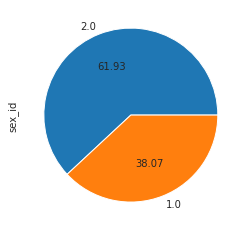

In [47]:
df_2021['sex_id'].value_counts().plot.pie(autopct='%.2f')
plt.show()

#### 2022

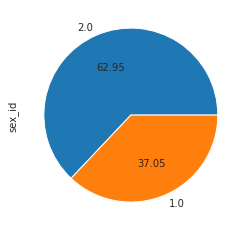

In [48]:
df_2022['sex_id'].value_counts().plot.pie(autopct='%.2f')
plt.show()

**Вывод:**  
Распределение по полу в части объема услуг не изменилось, а значит это нельзя считать фактором повлиявшим на повышение цены.  
Попробуем выяснить к какому полу относятся значения из датасета.

In [49]:
subset_22_wm = df_2022.loc[df_2022['service_name'].str.contains('гинеколога', case=False)]
subset_22_wm.sample(3)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,service_price,age_group
49315,32112481203,2022-02-18,"Прием гинеколога, повторный",1380,1,651992,2.0,35,1380.0,3. 30-36
63327,32511092503,2022-04-04,"Прием гинеколога, повторный",1380,1,935371,2.0,50,1380.0,6. 48-54
54615,32326904503,2022-03-19,"Прием гинеколога, повторный",1380,1,842339,2.0,49,1380.0,6. 48-54


Как ожидалось 1 - это мужчины, 2 - женщины.

In [50]:
df_2021.groupby('sex_id')['service_price'].agg(['count', 'mean'])

,count,mean
sex_id,,
1.0,10171,1126.661489
2.0,16544,1086.005198


In [51]:
df_2022.groupby('sex_id')['service_price'].agg(['count', 'mean'])

,count,mean
sex_id,,
1.0,15182,1178.580029
2.0,25795,1181.727622


In [52]:
df_2022.groupby('sex_id')['insured'].agg(['count'])

,count
sex_id,
1.0,15182
2.0,25795


In [53]:
df_mw_21 = df_2021.groupby('sex_id')['service_price'].agg(['count', 'mean'])
df_mw_22 = df_2022.groupby('sex_id')['service_price'].agg(['count', 'mean'])
merged_df = df_mw_21.merge(df_mw_22, on='sex_id', suffixes=('_2021', '_2022'))
merged_df

,count_2021,mean_2021,count_2022,mean_2022
sex_id,,,,
1.0,10171,1126.661489,15182,1178.580029
2.0,16544,1086.005198,25795,1181.727622


In [54]:
merged_df['price_change_pct'] = ((merged_df['mean_2022'] - merged_df['mean_2021']) / merged_df['mean_2021']) * 100
merged_df 

,count_2021,mean_2021,count_2022,mean_2022,price_change_pct
sex_id,,,,,
1.0,10171,1126.661489,15182,1178.580029,4.608176
2.0,16544,1086.005198,25795,1181.727622,8.814177


Средняя стоимость услуг для женщин увеличилась значительно выше среднего значения по портфелю: 8,81% против 6%

Посмотрим на доли уникальных клиентов. Для этого напишем маленькую функцию.

In [55]:
def count_unique(series):
    return len(series.unique())

#### 2021

In [56]:
pivot_table_21 = pd.pivot_table(df_2021, values='insured', index='sex_id', aggfunc=count_unique)
pivot_table_21 

,insured
sex_id,
1.0,725
2.0,1006


#### 2022

In [57]:
pivot_table_22 = pd.pivot_table(df_2022, values='insured', index='sex_id', aggfunc=count_unique)
pivot_table_22 

,insured
sex_id,
1.0,1164
2.0,1593


**Вывод:**  
Клиентское распределение по гендеру практически не изменилось.  Но изменение цен на услуги не равномерно.   
Если брать за baseline среднее значение в 6% инфляции на мед.услуги по данной клинике, то можно сделать вывод, что на услугах для мужчин повышение отразилось в меньшей степени - 4,6%. 
В то время как услуги для женщин стали дороже на 8.81%.  

**Гендерное распределение клиентов в клинике не изменилось, однако повышение средней стоимости на услуги для женщины превышает среднее значение.
Гипотеза не подтверждена.**

## Гипотеза 3
**Стоимость лечения повысилась из-за изменения возрастного распределения клиентского портфеля**

Рассмотрим возрастные сегменты по объему оказанных услуг.

In [63]:
df_age21 = df_2021.groupby(['age_group'])['service_price'].agg(['count', 'mean'])
df_age22 = df_2022.groupby(['age_group'])['service_price'].agg(['count', 'mean'])

In [64]:
merged_df = df_age21.merge(df_age22, on='age_group', suffixes=('_2021', '_2022'))
merged_df['price_change_pct'] = ((merged_df['mean_2022'] - merged_df['mean_2021']) / merged_df['mean_2021']) * 100
merged_df 

,count_2021,mean_2021,count_2022,mean_2022,price_change_pct
age_group,,,,,
0. до 18,2287,1118.546130,2881,1118.707046,0.014386
1. 18-24,923,1086.422535,1905,1200.346457,10.486152
2. 24-30,5620,1087.128114,7882,1203.581705,10.712039
3. 30-36,6487,1086.504702,9918,1188.480238,9.385651
4. 36-42,5080,1087.585630,8639,1194.815719,9.859462
5. 42-48,3039,1163.701547,4959,1156.576124,-0.612307
6. 48-54,1886,1098.449099,2708,1150.684269,4.755356
7. 54 - 60,677,1059.979321,1290,1149.147287,8.412236
8. 60+,737,1192.204885,795,1177.743396,-1.213004


Для наглядности добавим сравнение долей.

In [65]:
merged_df['2021_pct'] = merged_df['count_2021'] / merged_df['count_2021'].sum() *100
merged_df['2022_pct'] = merged_df['count_2022'] / merged_df['count_2022'].sum() *100
merged_df

,count_2021,mean_2021,count_2022,mean_2022,price_change_pct,2021_pct,2022_pct
age_group,,,,,,,
0. до 18,2287,1118.546130,2881,1118.707046,0.014386,8.554010,7.030773
1. 18-24,923,1086.422535,1905,1200.346457,10.486152,3.452274,4.648949
2. 24-30,5620,1087.128114,7882,1203.581705,10.712039,21.020347,19.235181
3. 30-36,6487,1086.504702,9918,1188.480238,9.385651,24.263166,24.203822
4. 36-42,5080,1087.585630,8639,1194.815719,9.859462,19.000598,21.082559
5. 42-48,3039,1163.701547,4959,1156.576124,-0.612307,11.366697,12.101911
6. 48-54,1886,1098.449099,2708,1150.684269,4.755356,7.054159,6.608585
7. 54 - 60,677,1059.979321,1290,1149.147287,8.412236,2.532166,3.148107
8. 60+,737,1192.204885,795,1177.743396,-1.213004,2.756583,1.940113


**Вывод: возрастная структура не претерпела значительных изменений.**  
Наблюдаются незначительные изменения долей в сегменте 18-42.

Данная таблица отражает именно объемы услуг и их распределение по возрастной структуре клиентского портфеля.  
Теперь можем посмотреть распределение по количеству уникальных клиентов

In [66]:
pivot_table_21 = pd.pivot_table(df_2021, values='insured', index='age_group', aggfunc=count_unique)
pivot_table_22 = pd.pivot_table(df_2022, values='insured', index='age_group', aggfunc=count_unique)
merged_df = pivot_table_21.merge(pivot_table_22, on='age_group', suffixes=('_2021', '_2022'))
merged_df['2021_pct'] = merged_df['insured_2021'] / merged_df['insured_2021'].sum() *100
merged_df['2022_pct'] = merged_df['insured_2022'] / merged_df['insured_2022'].sum() *100
merged_df

,insured_2021,insured_2022,2021_pct,2022_pct
age_group,,,,
0. до 18,276,311,15.681818,11.115082
1. 18-24,77,164,4.375000,5.861330
2. 24-30,345,578,19.602273,20.657613
3. 30-36,430,689,24.431818,24.624732
4. 36-42,309,546,17.556818,19.513939
5. 42-48,166,264,9.431818,9.435311
6. 48-54,84,131,4.772727,4.681916
7. 54 - 60,42,68,2.386364,2.430307
8. 60+,31,47,1.761364,1.679771


По уникальным клиентам ситуация аналогичная. Значительные изменения можно выделить только в сегменте клиентов до 18 лет.

**Вывод: изменение цены на мед.услуги не носит централизованный характер. Для различных поло-возрастных сегментов показатель изменения значительно отличается.
При этом можно выделить:**
- не типичное(в контексте среднего значения) повышение цены на услуги для женщин - 9%
- не типичное повышение цен на услуги для сегмента 18-42 лет - 10%

**Значительных изменений клиентского портфеля по возрасту не выявлено, при этом выявлено не типичное повышение цен на услуги для отдельных сегментов по возрасту, а также на услуги для женщин.  
Гипотеза не подтверждена.**

### Гипотеза 4
**Стоимость лечения повысилась из-за появления уникальных и дорогостоящих услуг**

In [57]:
df_2021.sort_values('service_price', ascending=False).head(10)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,service_price,age_group
18519,30961787103,2021-06-24,"гистерорезектоскопия при полипах , РДВ",26999,1,362928,2.0,51,26999.0,6. 48-54
15588,30961493203,2021-06-17,МРТ брюшной полости и забрюшинного пространств...,17325,1,634755,1.0,41,17325.0,4. 36-42
23794,31249334503,2021-08-20,МРТ головного мозга и гипофиза с контрастирова...,15225,1,544627,2.0,34,15225.0,3. 30-36
16373,30961571703,2021-06-06,МСКТ мочевыделительной системы с внутривенным ...,12075,1,634765,1.0,42,12075.0,5. 42-48
18518,30961787003,2021-06-24,Тотальная внутривенная анестезия от 20 минут д...,11550,1,362928,2.0,51,11550.0,6. 48-54
8316,30620826503,2021-04-13,МСКТ почек и надпочечников с внутривенным болю...,11025,1,544444,1.0,31,11025.0,3. 30-36
7416,30489600503,2021-03-28,МРТ гипофиза с контрастированием,9450,1,261304,1.0,37,9450.0,4. 36-42
26662,31249624503,2021-08-20,МРТ гипофиза с контрастированием,9450,1,680963,2.0,35,9450.0,3. 30-36
8115,30620806303,2021-04-14,МРТ головного мозга с контрастированием,9450,1,180725,2.0,25,9450.0,2. 24-30
7761,30489635003,2021-03-19,Хирургическое удаление доброкачественной опухо...,7665,1,512469,1.0,60,7665.0,8. 60+


In [58]:
df_2022.sort_values('service_price', ascending=False).head(10)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,service_price,age_group
76524,32801402203,2022-06-12,Эндоскопическая полипэктомия 2-й категории ( о...,9700,1,1072787,2.0,37,9700.0,4. 36-42
85341,33178144403,2022-08-09,"Вакцинация вакциной ""Менактра""",9000,1,1155165,2.0,0,9000.0,9. до 18
78769,32978761503,2022-07-06,Хирургическое удаление доброкачественной опухо...,8400,1,1155019,1.0,37,8400.0,4. 36-42
81777,32979065403,2022-07-03,Хирургическое удаление доброкачественной опухо...,8400,1,831955,2.0,57,8400.0,7. 54 - 60
77949,32978678403,2022-07-06,Хирургическое удаление доброкачественной опухо...,8400,1,1217341,1.0,46,8400.0,5. 42-48
81003,32978987103,2022-07-25,Вскрытие панариция,8400,1,596244,2.0,29,8400.0,2. 24-30
85058,33178103103,2022-08-26,МСКТ мягких тканей шеи с фонацией,8270,1,1155117,1.0,59,8270.0,7. 54 - 60
62921,32511051403,2022-04-13,Вскрытие панариция,8050,1,842480,2.0,36,8050.0,4. 36-42
56577,32327102903,2022-03-30,Хирургическое удаление доброкачественной опухо...,8050,1,774327,2.0,26,8050.0,2. 24-30
59701,32510726003,2022-04-11,Вскрытие панариция,8050,1,935446,1.0,23,8050.0,1. 18-24


Удивительно, на наиболее дорогостоящие услуги были оказаны в 2021 году. Там есть целых 6 строк со стоимостью услуги более 10 000 руб. В то время как в 2022 услуг дороже 10 000 оказано не было.  
При этом не видно в 2022 услуг по МРТ, изучим этот вопрос чуть подробнее ниже.

In [68]:
df_2021['service_name'].str.contains('МРТ').sum()

43

In [69]:
df_2022['service_name'].str.contains('МРТ').sum()

6

In [70]:
df_2022[df_2022['service_name'].str.contains('МРТ')]

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,service_price,age_group
82580,33177659403,2022-08-05,МРТ плечевого сустава,7720,1,1217298,1.0,41,7720.0,4. 36-42
82720,33177676103,2022-08-06,МРТ коленного сустава,6500,1,1154880,2.0,31,6500.0,3. 30-36
83450,33177813203,2022-08-26,МРТ коленного сустава,13000,2,1306792,2.0,27,6500.0,2. 24-30
83942,33177894903,2022-08-19,МРТ крестцово-подвздошных сочленений,5400,1,1217249,2.0,22,5400.0,1. 18-24
84501,33178010803,2022-08-12,МРТ крестцово-подвздошных сочленений,5400,1,1217378,2.0,35,5400.0,3. 30-36
84562,33178018103,2022-08-29,МРТ тазобедренных суставов,7720,1,576389,1.0,25,7720.0,2. 24-30


**Интересный факт** несмотря на значительное увеличение объема оказанных услуг в 2022 году, количество услуг по направлению МРТ уменьшилось в 7 раз. 
При этом все они были оказаны в последний месяц исследования - август 2022. 
То есть с января по июль 2022 года в данной клинике МРТ вообще не проводилось. И только в августе клиника стала проводить МРТ исследования. При этом, судя по стоимости, это не самые сложные и дорогие исследования в данном направлении(в сравнении с 2021 годом).

In [73]:
df_2021.sort_values('service_price', ascending=True).head(10)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,service_price,age_group
23416,31249295503,2021-08-23,Калий,147,1,402419,2.0,33,147.0,3. 30-36
22765,31112077303,2021-07-15,Инстилляция лекарственных веществ в конъюнктив...,147,1,490941,2.0,29,147.0,2. 24-30
24045,31249359603,2021-08-27,Инстилляция лекарственных веществ в конъюнктив...,147,1,680933,1.0,11,147.0,0. до 18
10289,30621023903,2021-04-06,Инстилляция лекарственных веществ в конъюнктив...,147,1,161476,2.0,36,147.0,4. 36-42
10650,30621060103,2021-04-01,Инстилляция лекарственных веществ в конъюнктив...,147,1,512503,1.0,32,147.0,3. 30-36
8289,30620823703,2021-04-23,Инстилляция лекарственных веществ в конъюнктив...,147,1,139539,2.0,42,147.0,5. 42-48
1572,30268314503,2021-01-22,Инстилляция лекарственных веществ в конъюнктив...,147,1,181935,2.0,36,147.0,4. 36-42
12657,30786066703,2021-05-12,Калий,147,1,139539,2.0,42,147.0,5. 42-48
2826,30346885103,2021-02-23,Натрий,147,1,490842,1.0,41,147.0,4. 36-42
2825,30346885003,2021-02-23,Калий,147,1,490842,1.0,41,147.0,4. 36-42


In [74]:
df_2022.sort_values('service_price', ascending=True).head(10)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,service_price,age_group
73684,32801100503,2022-06-29,Натрий,150,1,774389,2.0,46,150.0,5. 42-48
57720,32327217903,2022-03-14,Натрий,150,1,842354,2.0,50,150.0,6. 48-54
50108,32112561303,2022-02-05,Инстиляция лекарственных препаратов,150,1,599347,2.0,43,150.0,5. 42-48
69563,32631611803,2022-05-04,Инстиляция лекарственных препаратов,150,1,935424,1.0,49,150.0,6. 48-54
53209,32326760203,2022-03-17,Натрий,150,1,873318,1.0,46,150.0,5. 42-48
77196,32801470503,2022-06-07,Инстиляция лекарственных препаратов,150,1,1072549,2.0,64,150.0,8. 60+
71306,32631787503,2022-05-14,Калий,150,1,935447,1.0,31,150.0,3. 30-36
48934,32112442303,2022-02-15,Инстиляция лекарственных препаратов,150,1,716081,1.0,27,150.0,2. 24-30
50093,32112559803,2022-02-21,Калий,150,1,716092,2.0,75,150.0,8. 60+
50790,32112630203,2022-02-27,Инстиляция лекарственных препаратов,150,1,842343,1.0,36,150.0,4. 36-42


По самым дешевым услугам аномалий не выявлено. В 2021 - 147 руб. В 2022 - 150 руб.

**Вывод  Аномально дорогие или дешевые услуги в 2022 году не обнаружены.  Максимальное значение по стоимости услуги зафиксировано в 2021 года - 27 000 руб. В 2022 не было услуг дороже 10 000 руб. 
Гипотеза не подтверждена.**  

При этом, стоит отметить радикальное снижение количества услуг по направлению МРТ. Вероятно это связано с какими-либо проблемами с оборудованием. 

*Согласно данным* [из открытых источников](https://74.ru/text/health/2022/03/04/70485971/):  
*Аппараты УЗИ, КТ и МРТ, мониторы для реанимаций, оборудование для проведения эндоскопических операций — список можно продолжать практически бесконечно — экспортируются из стран, которые наложили ограничения на отношения с Россией. И это касается не только закупки нового оборудования, но и обслуживания уже приобретенных и работающих машин: нужны детали, специализированный техосмотр, рассказывает «Доктор Питер».*

Это может обьяснить увеличение цен на УЗИ, снижение объема возможных МРТ исследований.

### Гипотеза 5
**Стоимость лечения повысилась из-за увеличения количества услуг оказанных за 1 визит**

In [75]:
grouped = df_2021.groupby(['service_date', 'insured']).agg({'service_name': 'count', 'service_price': 'sum'})
mean_services_per_visit = grouped['service_name'].sum() / len(grouped)
print("Среднее количество услуг, оказанных за 1 визит 2021: ", mean_services_per_visit)

Среднее количество услуг, оказанных за 1 визит 2021:  2.842138832784097


In [76]:
grouped = df_2022.groupby(['service_date', 'insured']).agg({'service_name': 'count', 'service_price': 'sum'})
mean_services_per_visit = grouped['service_name'].sum() / len(grouped)
print("Среднее количество услуг, оказанных за 1 визит 2022: ", mean_services_per_visit)

Среднее количество услуг, оказанных за 1 визит 2022:  2.838921989746432


In [77]:
grouped = df_2021.groupby(['service_date', 'insured'])
result = grouped.agg({'service_price': ['count', 'sum', 'mean']})
result.columns = ['visit_count', 'total_cost', 'avg_cost_per_visit']
average_cost = result['avg_cost_per_visit'].mean()
print('Средняя стоимость одного визита на одного уникального застрахованного в 2021: ', average_cost)

Средняя стоимость одного визита на одного уникального застрахованного в 2021:  1325.2370342968456


In [78]:
grouped = df_2022.groupby(['service_date', 'insured'])
result = grouped.agg({'service_price': ['count', 'sum', 'mean']})
result.columns = ['visit_count', 'total_cost', 'avg_cost_per_visit']
average_cost = result['avg_cost_per_visit'].mean()
print('Средняя стоимость одного визита на одного уникального застрахованного в 2021: ', average_cost)

Средняя стоимость одного визита на одного уникального застрахованного в 2021:  1373.974829088728


**Вывод: показатель среднего количества услуг на 1 визит практически не изменился, соотвественно его нельзя считать причиной повышения стоимости.  
Показатель средней стоимости одного визита в 2022 году незначительно повысился, в пределах общей инфляции на услуги.  
Гипотеза не подтверждена**

### Гипотеза 6
**Стоимость лечения повысилась из-за изменения среднего количества оказанных услуг на один медицинский кейс**


In [79]:
df = df_2021.sort_values(['insured', 'service_date'])
df['days_between_services'] = df.groupby('insured')['service_date'].diff().dt.days - 1
df = df[(df['days_between_services'].isnull()) | (df['days_between_services'] <= 14)]
services_per_case = df.groupby(['insured', df.groupby('insured')['days_between_services'].cumsum()])['service_name'].count()
mean_services_per_case = services_per_case.mean()

In [80]:
print(f'Cреднее количество услуг в одном кейсе в 2021 {mean_services_per_case}')

Cреднее количество услуг в одном кейсе в 2021 1.6654601141584295


In [81]:
df = df_2022.sort_values(['insured', 'service_date'])
df['days_between_services'] = df.groupby('insured')['service_date'].diff().dt.days - 1
df = df[(df['days_between_services'].isnull()) | (df['days_between_services'] <= 14)]
services_per_case = df.groupby(['insured', df.groupby('insured')['days_between_services'].cumsum()])['service_name'].count()
mean_services_per_case = services_per_case.mean()

In [82]:
print(f'Cреднее количество услуг в одном кейсе в 2022 {mean_services_per_case}')

Cреднее количество услуг в одном кейсе в 2022 1.6210186862216724


**Вывод: показатель среднего количества услуг на 1 медицинский кейс снизился в 2022, соотвественно его нельзя считать причиной повышения стоимости.  
Гипотеза не подтверждена**

В заключении визуализируем изменение средней стоимости на услуги помесячно

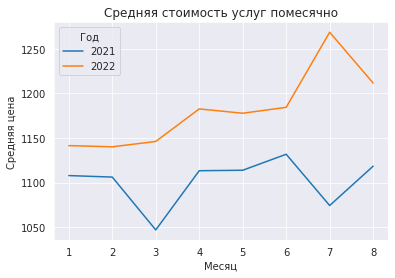

In [83]:
df = pd.concat([df_2021, df_2022])

df['service_date'] = pd.to_datetime(df['service_date'])

df['month'] = df['service_date'].dt.month

monthly_avg_prices = df.groupby(['month', df['service_date'].dt.year])['service_price'].mean()

monthly_avg_prices.unstack().plot(kind='line')
plt.xlabel('Месяц')
plt.ylabel('Средняя цена')
plt.title('Средняя стоимость услуг помесячно')
plt.legend(title='Год', loc='upper left')
plt.show()


## Вывод

В рамках задачи был рассмотрен и изучен датасет с информацией по медицинским услугам в одной из клиник за 2021-2022 годы.
По результатам основного анализа было выявлено повышение цен на мед.услуги в среднем на **6%** в 2022 г. по сравнению с аналогичным периодом 2021 года.

В рамках поиска причин повышения цены были изучены и проверены следующие гипотезы:

| Гипотеза | Результат |
|---------------------------|----------------------------|
| Стоимость лечения повысилась из-за изменения гендерного состава клиентского портфеля  | Не подтверждена   |
| Стоимость лечения повысилась из-за изменения возрастного распределения клиентского портфеля | Не подтверждена |
| Стоимость лечения повысилась из-за появления уникальных и дорогостоящих услуг | Не подтверждена |
| Стоимость лечения повысилась из-за увеличения количества услуг оказанных за 1 визит | Не подтверждена |
| Стоимость лечения повысилась из-за изменения среднего количества оказанных услуг на один медицинский кейс| Не подтверждена |

В рамках поиска причин повышения цены были выявлены следующие особенности:
- в 2022 году произошло дополнительное сегментирование наименований услуг из-за чего не все услуги можно сравнить напрямую
- среднее значение повышения стоимости на мед.услуги для женщин(+9%) значительно превышает среднее значение по всему портфелю(6%)
- среднее значение повышения стоимости на мед.услуги для сегмента  18-42 лет (10%) значительно превышает среднее значение по всему портфелю(6%)
- значительное увеличение в 2022 г. по стоимости зафиксировано на УЗИ исследования. Это может быть связано санкционными рисками по данному оборудованию, комплектующим
- из ассортимента услуг 2022 г. практически пропали услуги МРТ. Это может быть связано санкционными рисками по данному оборудованию

Примечания:
1. Для изучения вопроса с оборудованием рекомендуется запросить информацию из клиники по сокращению МРТ-исследований, возможно произошло перепрофилирование, либо переработка ассортимента мед.услуг
2. Вероятно, август можно исключить из анализа, поскольку данные за 2022 год выглядит не полными, соотвественно могут давать искажения на общие показатели по году.